In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# GeoJSON Hexbins
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

#Get Gun Deaths
gun_deaths = pd.read_csv("data-table.csv")

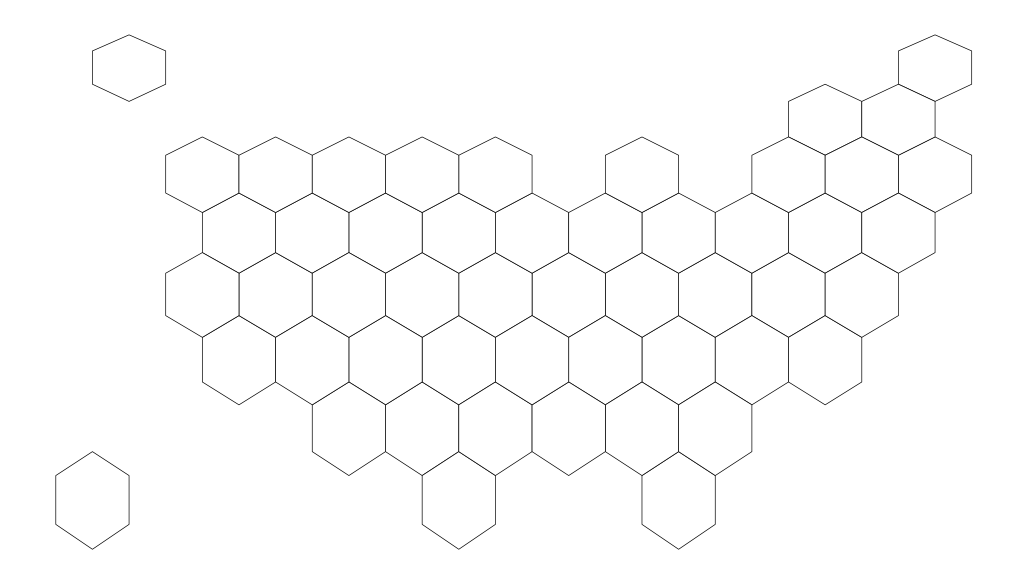

In [3]:
plt.rcParams["figure.figsize"]=13,13

# Draw a map with matplotlib
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

In [4]:
geoData = geoData.merge(gun_deaths, left_on="iso3166_2", right_on="STATE")

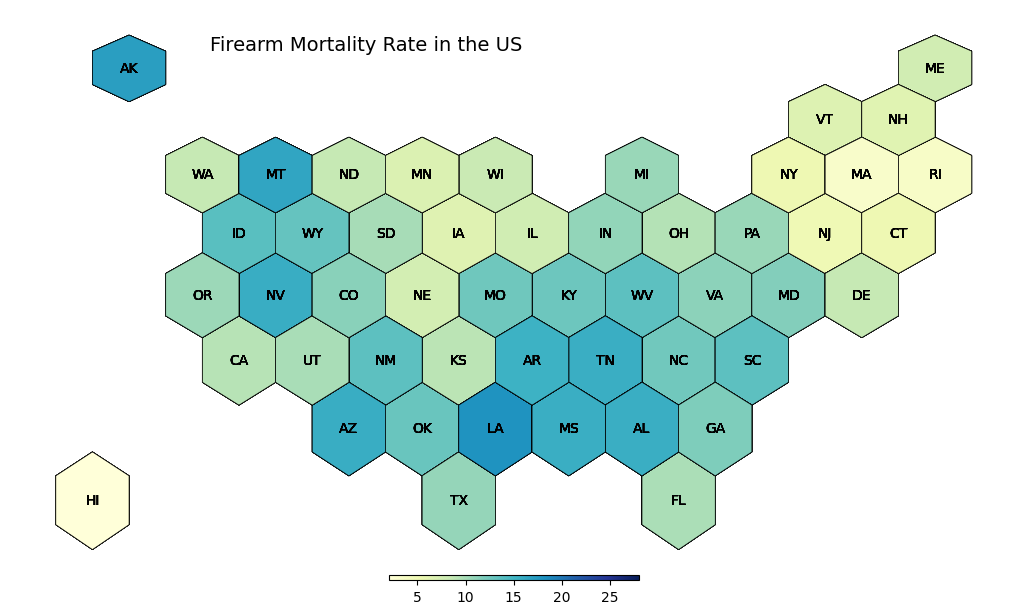

In [5]:
# add a "centroid" column with the centroid position of each county
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))

# map counties with the right color:
geoData.plot(
    ax=ax,
    column="RATE", 
    cmap="YlGnBu", 
    # norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='black', 
    linewidth=.5
);

# Remove useless axis
ax.axis('off');

# Add title, subtitle and author
ax.annotate('Firearm Mortality Rate in the US', xy=(200,540),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')

# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color="black"
    )

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=2, vmax=28))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 , ax=ax);

In [17]:
fig.savefig('firearm_mortality_rate.png', bbox_inches='tight')